# Machine Learning - Exercise 1
# Classification Evaluation

This exercise illustrates examples of evaluation of solutions of classification problems.

## Import

Import libraries that contains the implementations of the functions used in the rest of the program.



In [1]:
import random
import numpy as np
import sklearn.metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

print("Libraries imported.")

Libraries imported.


## Load data

Load training data.

Choose one of the datasets described in the next subsections.

More details on these datasets are available in https://scikit-learn.org/stable/datasets/toy_dataset.html


### IRIS dataset

In [2]:
DB = datasets.load_iris()
dataset_name = "Iris"
class_names = np.array([str(c) for c in DB.target_names])
X_all = DB.data
y_all = DB.target

### Wine dataset

In [ ]:
DB = datasets.load_wine()
dataset_name = "Wines"
class_names = np.array([str(c) for c in DB.target_names])
X_all = DB.data
y_all = DB.target

### Digits dataset

In [ ]:
DB = datasets.load_digits()
dataset_name = "Digits"
class_names = np.array([str(c) for c in DB.target_names])
X_all = DB.data
y_all = DB.target

### Unbalanced Digits dataset

Adapted from the Digits dataset with digit 0 mapped to class '0' and all other digits mapped to class '1'

In [ ]:
# Binary Digits unbalanced
DB = datasets.load_digits()
dataset_name = "Digits_01_unbalanced"
class_names = np.array(["0","1"])
X_all = DB.data
y_all = DB.target
cont = 0
for i in range(0,len(y_all)):
  if y_all[i] != 0:
    y_all[i] = 1
    cont += 1
print("Percentage of non-zero digits: %f" %(cont/len(y_all)))

Percentage of non-zero digits: 0.900946


### Summary of the dataset

Print some information about the dataset.

Data structures

    Input X: array ( n x m )
    Output Y: array ( n x 1 )

In [5]:
print("Dataset: %s" %(dataset_name))
print("Input shape: %s" %str(X_all.shape))
print("Output shape: %s" %str(y_all.shape))
print("Number of attributes/features: %d" %(X_all.shape[1]))
print("Number of classes: %d %s" %(len(class_names), str(class_names)))
print("Number of samples: %d" %(X_all.shape[0]))

Dataset: Iris
Input shape: (150, 4)
Output shape: (150,)
Number of attributes/features: 4
Number of classes: 3 ['setosa' 'versicolor' 'virginica']
Number of samples: 150


### Show an example

Display a random sample.

In [6]:
id = random.randrange(0,X_all.shape[0])

print("x%d = %r" %(id,X_all[id]))
print("y%d = %r ['%s']" %(id,y_all[id],class_names[y_all[id]]))

x74 = array([6.4, 2.9, 4.3, 1.3])
y74 = 1 ['versicolor']


## Split data

Split the data set in training set `X_train`, `y_train` and test set `X_test`, `y_test`, using `test_size` to denote percentage of samples in the test set.

Note:
`random_state` parameter is used as random seed. Change this value to generate a different split.

IMPORTANT: solution will depend on this data split.


In [13]:
# The need of a division between train set and test set arises from the fact what we need a way to evaluate
# how a model performs in unseen data.
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all,
                                                    test_size=0.333, #2/3 taining and 1/3 test -> tradeoff, better model for little less  
                                                    random_state=1127) # This sets the seed to a given costant, makes the output repr=oducible

print("Size of training set: %d" %X_train.shape[0])
print("Size of test set: %d" %X_test.shape[0])

print('First training sample')
id = 0
print("    x_train_%d = %r" %(id,X_train[id]))
print("    y_train_%d = %r ['%s']" %(id,y_train[id],class_names[y_train[id]]))

print('First test sample')
id = 0
print("    x_test_%d = %r" %(id,X_test[id]))
print("    y_test_%d = %r ['%s']" %(id,y_test[id],class_names[y_test[id]]))


Size of training set: 100
Size of test set: 50
First training sample
    x_train_0 = array([6.7, 3.3, 5.7, 2.5])
    y_train_0 = 2 ['virginica']
First test sample
    x_test_0 = array([5.5, 3.5, 1.3, 0.2])
    y_test_0 = 0 ['setosa']


## Create a Model

Define the model that will be used for learning.

Create an instance of a class implementing a classification method.



**Decision Trees**

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [14]:
model = tree.DecisionTreeClassifier()

**Support Vector Machines**

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svm%20svc#sklearn.svm.SVC

In [ ]:
model = svm.SVC(kernel='linear', C=1)

Probabilistic generative model

**Gaussian Naive Bayes**

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html?highlight=gaussiannb#sklearn.naive_bayes.GaussianNB


In [ ]:
model = GaussianNB()

Probabilistic discriminative model

**Logistic regression**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression


In [ ]:
model = LogisticRegression()

## Dataset's standardization
The goal of standardization is to ensure that all features have similar scales, typically with a mean of 0 and a standard deviation of 1. This process helps improve the performance and convergence of various machine learning algorithms, especially those that are sensitive to the scale of input features.

More details on how to apply standardization at https://scikit-learn.org/stable/modules/preprocessing.html and on the importance of feature scaling at https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py.




In [15]:
pipe = make_pipeline(preprocessing.StandardScaler(), model)

## Fit the model

Finding a solution for this model given the data set.
The solution is stored in the model object.


In [16]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

### Plot the decision tree


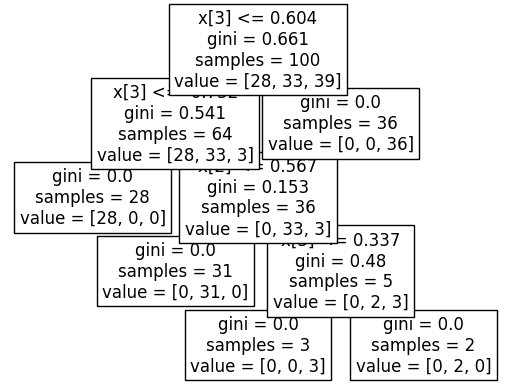

In [17]:
# only for DecisionTrees model

if isinstance(model, tree.DecisionTreeClassifier):
  tree.plot_tree(model,fontsize=12)
  plt.rcParams["figure.figsize"] = (10,20)
  plt.show()

## Predict on test set

Use test set for prediction.

In [18]:
y_pred = pipe.predict(X_test)

Use this statement to generate a prediction vector of all values '1' useful to test performance with the Unblanced Digits dataset.



In [ ]:
# Result of model that predicts only 1 (for unblanced digits)
#y_pred = np.ones(len(X_test))

## Evaluate the Model

Evaluation of a specific solution on the test set, comparing predicted values `y_pred` with test values `y_test`.

### Accuracy

In [20]:
acc = pipe.score(X_test, y_test)
print("Accuracy %.3f" %acc)

Accuracy 0.940


### Precision & Recall

Classification report contains more accurate performance information.

In [21]:
print(classification_report(y_test, y_pred, labels=None, target_names=class_names, digits=3))

              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        22
  versicolor      0.889     0.941     0.914        17
   virginica      0.900     0.818     0.857        11

    accuracy                          0.940        50
   macro avg      0.930     0.920     0.924        50
weighted avg      0.940     0.940     0.939        50



### Confusion Matrix

Shows the results in a graphical form.

In [22]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        pass
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    ax.set_ylim(len(classes)-0.5, -0.5)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

[[22  0  0]
 [ 0 16  1]
 [ 0  2  9]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

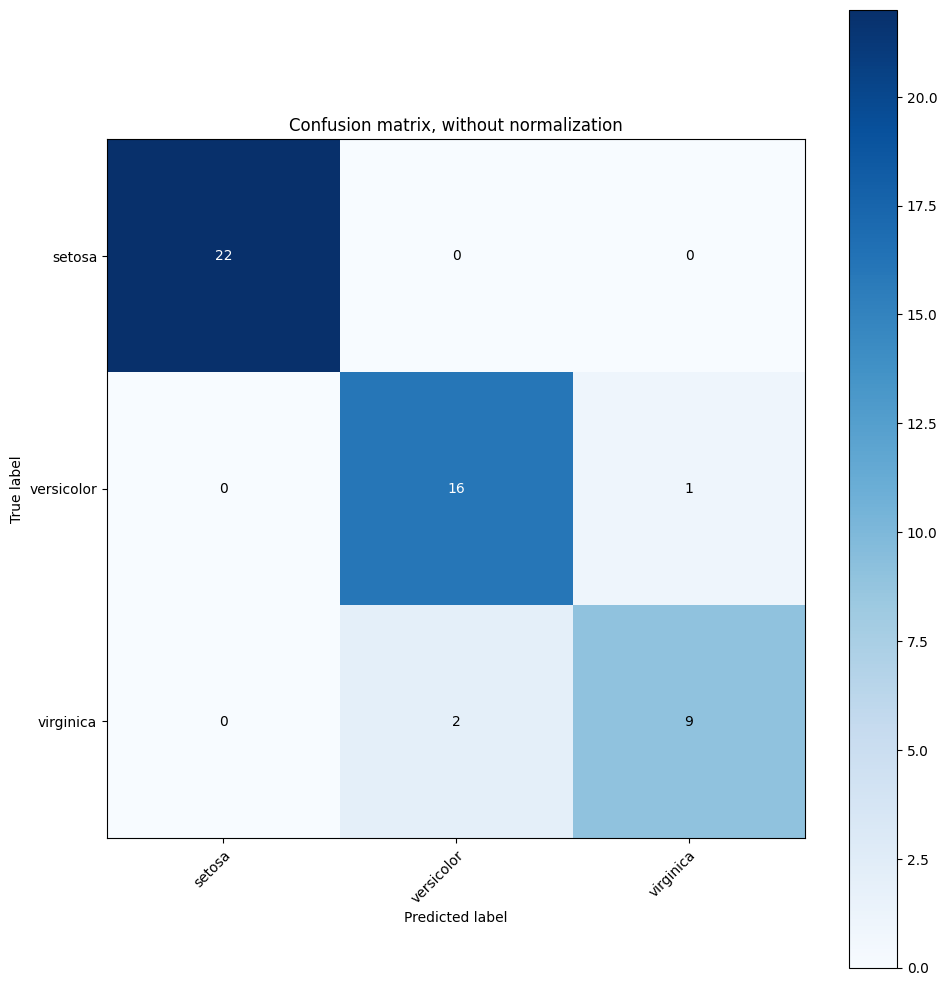

In [23]:
cm = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
print(cm)
plt.rcParams["figure.figsize"] = (10,10)
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=False)

## Evaluate a specific instance of a method

Evaluation of a specific method with instantiated hyper-parameters
through Cross Validation

Additional splitting methods described in https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection


In [24]:
# Cross Validation
cv = ShuffleSplit(n_splits=5, test_size=0.333, random_state=145)
scores = cross_val_score(pipe, X_all, y_all, cv=cv)
print(scores)
print("Accuracy: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.94 0.94 0.98 0.86 0.94]
Accuracy: 0.932 (+/- 0.08)


## Prediction of a new sample

In [25]:
if dataset_name == "Iris":
  xnew = np.array([8.5, 2.6, 9.2, 0.3])
elif dataset_name == "Wines":
  xnew = np.array([12, 2.5, 2.6, 15, 186, 1.5, 9.1,
                   0.44, 2.2, 5.6, 2.9, 3.7, 380])
elif dataset_name == "Digits" or dataset_name == "Digits_01_unbalanced":
   xnew = np.array([
        0,  0,  8, 13, 18, 13, 11,  1,  0, 10,  9,  4,  6,
       16,  3,  0,  0,  0,  0, 10,  1, 13,  0,  0,  0,  0,
        0,  7, 14,  2,  0,  0,  0,  0,  0,  7, 13,  1,  0,
        0,  0,  0,  0,  0,  8, 13,  1,  0,  0,  0,  0,  0,
       13,  6,  7,  1,  0,  0, 14, 12, 13,  1,  0,  0])

xnew = xnew.reshape(1,-1)

print("x_new = %r" %(xnew))
ynew = model.predict(xnew)
print("y_pred = %d %s" %(ynew,class_names[ynew]))

# only for probabilistic models
try:
  mconf = np.max(model.predict_proba(xnew))
  print("Confidence: %.2f" %(mconf))
except:
  pass

x_new = array([[8.5, 2.6, 9.2, 0.3]])
y_pred = 2 ['virginica']
Confidence: 1.00


/tmp/ipykernel_6078/4157857046.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("y_pred = %d %s" %(ynew,class_names[ynew]))


## Common Mistake

Evaluate solution on data used for training!!!


In [26]:
pipe.score(X_all,y_all)

0.98

## Home Exercises

**Question 1**

Design an evaluation procedure to assess and compare the different performance of the classification models seen above on the Digits dataset

  


**Answer 1**

The dataset is a collection of digit images.

In [62]:
import random
import matplotlib.pyplot as plt
DB = datasets.load_digits()
dataset_name = "Digits"
class_names = np.array([str(c) for c in DB.target_names])
X_all = DB.data
y_all = DB.target
# f, axarr = plt.subplots(3,3)
# samples = [X_all[i] for i in random.sample(list(range(len(X_all))), 10)]
# for i in range(3):
#     for j in range(3):
#         axarr[i][j].matshow(np.array((samples[i+j])).reshape((8,8)),cmap = 'gray')

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all,
                                                    test_size=0.333, #2/3 taining and 1/3 test -> tradeoff, better model for little less  
                                                    random_state=1127) # This sets the seed to a given costant, makes the output repr=oducible

In [104]:
models = (
    tree.DecisionTreeClassifier(criterion='entropy'),
    svm.SVC(kernel='linear', C=1),
    GaussianNB(),
    LogisticRegression()
)
classification_reports = {}
for model in models:
    pipe = make_pipeline(preprocessing.StandardScaler(), model)
    pipe.fit(X_train,y_train)
    acc = pipe.score(X_test, y_test)
    print(f"Model: {type(model).__name__}, Accuracy {acc:.3f}" )

Model: DecisionTreeClassifier, Accuracy 0.831
Model: SVC, Accuracy 0.960
Model: GaussianNB, Accuracy 0.791
Model: LogisticRegression, Accuracy 0.958


Our setting is the following, we have a balanced data and a misclassification does not cause major issues (we're not classifying a patient for cancer), thus the accuracy(fraction of predictions our model got right) is suitable, so SVM is the best.

Sources:
- [google developers](https://developers.google.com/machine-learning/crash-course/classification/accuracy)

Predicted value by DecisionTreeClassifier 9, True value: 7
Predicted value by SVC 7, True value: 7
Predicted value by GaussianNB 9, True value: 7
Predicted value by LogisticRegression 7, True value: 7


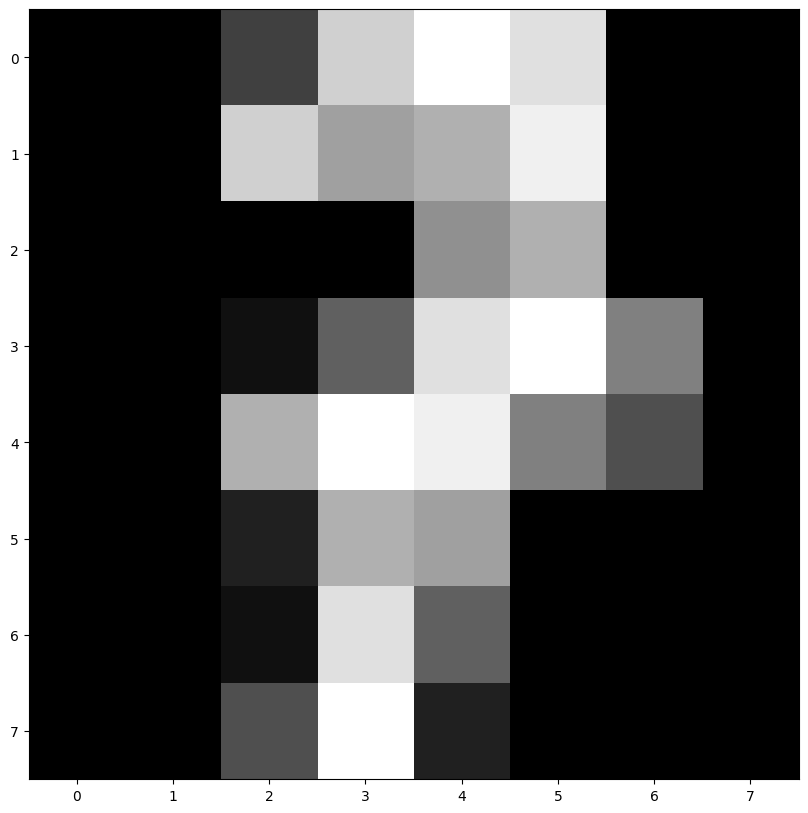

In [95]:
# i = random.randint(0,len(y_test))
# for model in models:
#     print(f"Predicted value by {type(model).__name__} {model.predict(np.array([X_test[i]]).reshape(1,-1))[0]}, True value: {y_test[i]}")
# plt.imshow(np.array(X_test[i]).reshape(8,8),cmap='gray')
# plt.show()

**Question 2**

Consider the Unbalanced Digits dataset and compare one of the above classification method with the classifier that always returns the most common label in the dataset. Which performance metrics are significant in this comparison?



**Question 3**

Try removing the standardization step. How does this affect the training and performance of the different classification models?
